# Portfolio 2: Analysing COVID-19 Data

In [1]:
#loading the libraries required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from datetime import time
import seaborn as sns
from pylab import rcParams

%matplotlib inline

Reading the live dataset from the git directory

In [2]:
# load the live dataset, assumes a working network connection
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

In [3]:
#Displays the first five entries of our dataframe covid
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [4]:
covid.shape

(266, 126)

## Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

For the analysis we want to do we'll look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then want to drop the non-numeric columns to leave us with just the numbers on each day for each country.  This can be done using the [`groupby`](https://pandas.pydata.org/docs/getting_started/10min.html#grouping) method and the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method.  We can use these to make a new dataframe containing just the numerical data.

In [5]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])

In [6]:
grouped.shape

(188, 122)

In [7]:
grouped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
Albania,0,0,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
Algeria,0,0,0,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
Andorra,0,0,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
Angola,0,0,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


You can now select just the data for one country [using the `loc` method](https://pandas.pydata.org/docs/getting_started/10min.html#selection) since the new dataframe will have the grouped values (Countries) as the row labels. Select the data for one country (you choose which) and plot it.  You should see the exponential rise in case numbers over time.

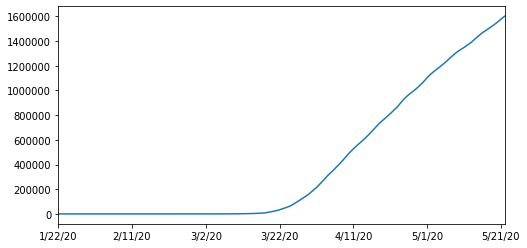

In [8]:
#loc method is used to filter and select data based on labels
#Our labels are 'Country/Region' and dates
plt.figure(figsize=(8,4))
df =grouped.loc['US']
df.plot.line()

* Plotted the data for US using line plot. We can observe from the graph that there is an increase in the number of cases after 2nd March'20.

## Comparing Countries

One of the classic displays in the news is the comparison between countries. 

In [9]:
a= grouped.loc['China']
b= grouped.loc['US']
c= grouped.loc['Italy']
d= grouped.loc['United Kingdom']
e= grouped.loc['Australia']
g= grouped.loc['Ireland']
h= grouped.loc['India']

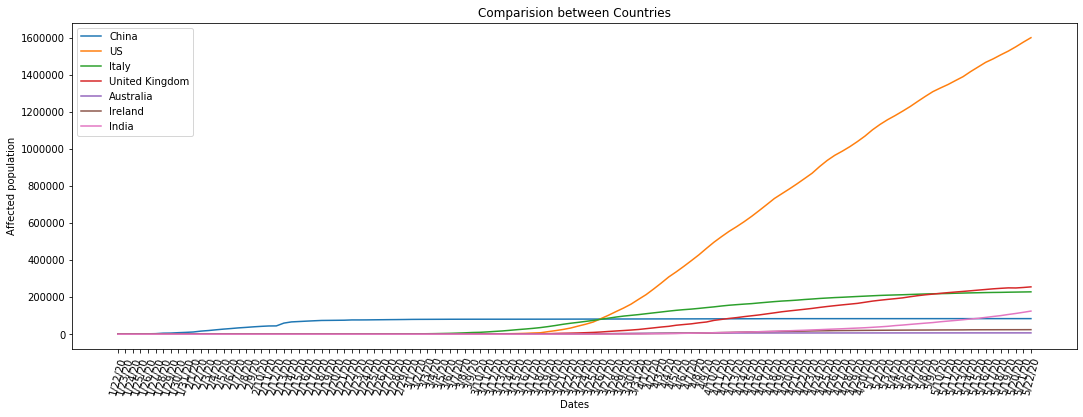

In [10]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.plot(a, label= 'China')
plt.plot(b, label= 'US')
plt.plot(c, label= 'Italy')
plt.plot(d, label= 'United Kingdom')
plt.plot(e, label= 'Australia')
plt.plot(g, label= 'Ireland')
plt.plot(h, label= 'India')


#Adding legend, title and labels
plt.title('Comparision between Countries')
plt.xlabel('Dates')
plt.ylabel('Affected population')
plt.legend()

plt.show()

* Here 'Country/Region' is as an index. Here we want to plot for different countries. So I have selected the data using loc on the index.

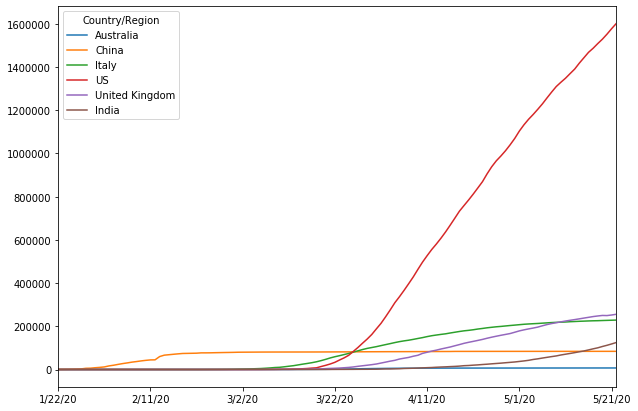

In [11]:
grouped_cp =grouped.T
grouped_cp =grouped_cp[['Australia','China','Italy','US','United Kingdom','India']]

plt.rcParams['figure.figsize'] = (10,7)
grouped_cp.plot.line()

* A better visualisation in terms of x axis labelling can be observed by taking the transpose of the dataframe and plotting it

**Challenge** A very useful visualisation shows the data for different countries aligned from the time that they have 100 confirmed cases.  To create this figure, you need to take only the part of each time series after the value is greater than or equal to 100 and then plot this starting at 0 on the x-axis.  This is a bit more involved but will allow you to explore Pandas a bit more.

In [12]:
my_analysis = grouped.copy()

In [13]:
# Iterated over the column values for original data
# if the value is less than 100 then it is set to NaN
# Using loc filtered out the countries in interest
for col in my_analysis.columns:
    my_analysis[col][my_analysis[col] < 100] = 'NaN'

#Selected data for countries of our interest
my_countries = my_analysis.loc[['Australia','China','Italy','US','United Kingdom','India']]

C:\Users\Bhagyashree\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
my_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,84024,84029,84038,84044,84054,84063,84063,84063,84063,84081
Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658
US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1390406,1417774,1442824,1467820,1486757,1508308,1528568,1551853,1577147,1600937
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,230985,234440,238004,241461,244995,247709,250138,249619,252246,255544
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794


In [15]:
# Created a copy to use for later analysis
mylist=my_countries 

In [16]:
# Created a transpose of the dataframe for better evaluation and representation
my_countries=my_countries.T

In [17]:
my_new_countries=my_countries#.rename_axis("Dates")

In [18]:
my_new_countries

Country/Region,Australia,China,Italy,US,United Kingdom,India
1/22/20,NaN,548,NaN,NaN,NaN,NaN
1/23/20,NaN,643,NaN,NaN,NaN,NaN
1/24/20,NaN,920,NaN,NaN,NaN,NaN
1/25/20,NaN,1406,NaN,NaN,NaN,NaN
1/26/20,NaN,2075,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5/18/20,7068,84063,225886,1508308,247709,100328
5/19/20,7072,84063,226699,1528568,250138,106475
5/20/20,7081,84063,227364,1551853,249619,112028
5/21/20,7095,84063,228006,1577147,252246,118226


In [19]:
# Dropped the NaN cells
# Done this to ignore the cells below 100
my_new_countries=my_new_countries[(my_new_countries != 'NaN').all(1)]
my_new_countries

Country/Region,Australia,China,Italy,US,United Kingdom,India
3/14/20,250,80977,21157,2729,1144,102
3/15/20,297,81003,24747,3536,1145,113
3/16/20,377,81033,27980,4661,1551,119
3/17/20,452,81058,31506,6437,1960,142
3/18/20,568,81102,35713,7781,2642,156
...,...,...,...,...,...,...
5/18/20,7068,84063,225886,1508308,247709,100328
5/19/20,7072,84063,226699,1528568,250138,106475
5/20/20,7081,84063,227364,1551853,249619,112028
5/21/20,7095,84063,228006,1577147,252246,118226


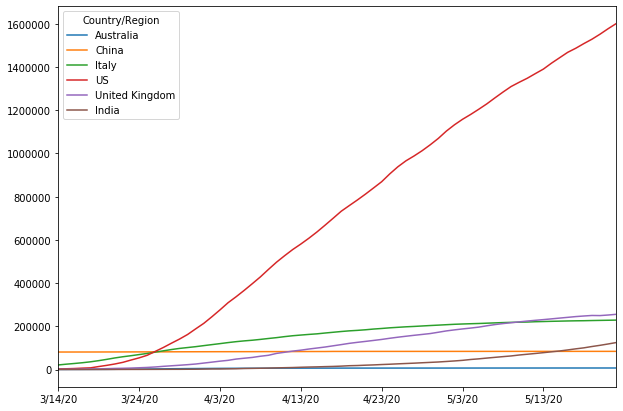

In [20]:
plt.rcParams['figure.figsize'] = (10,7)
_ = my_new_countries.plot()

Text(0.5, 0, 'Affected Population')

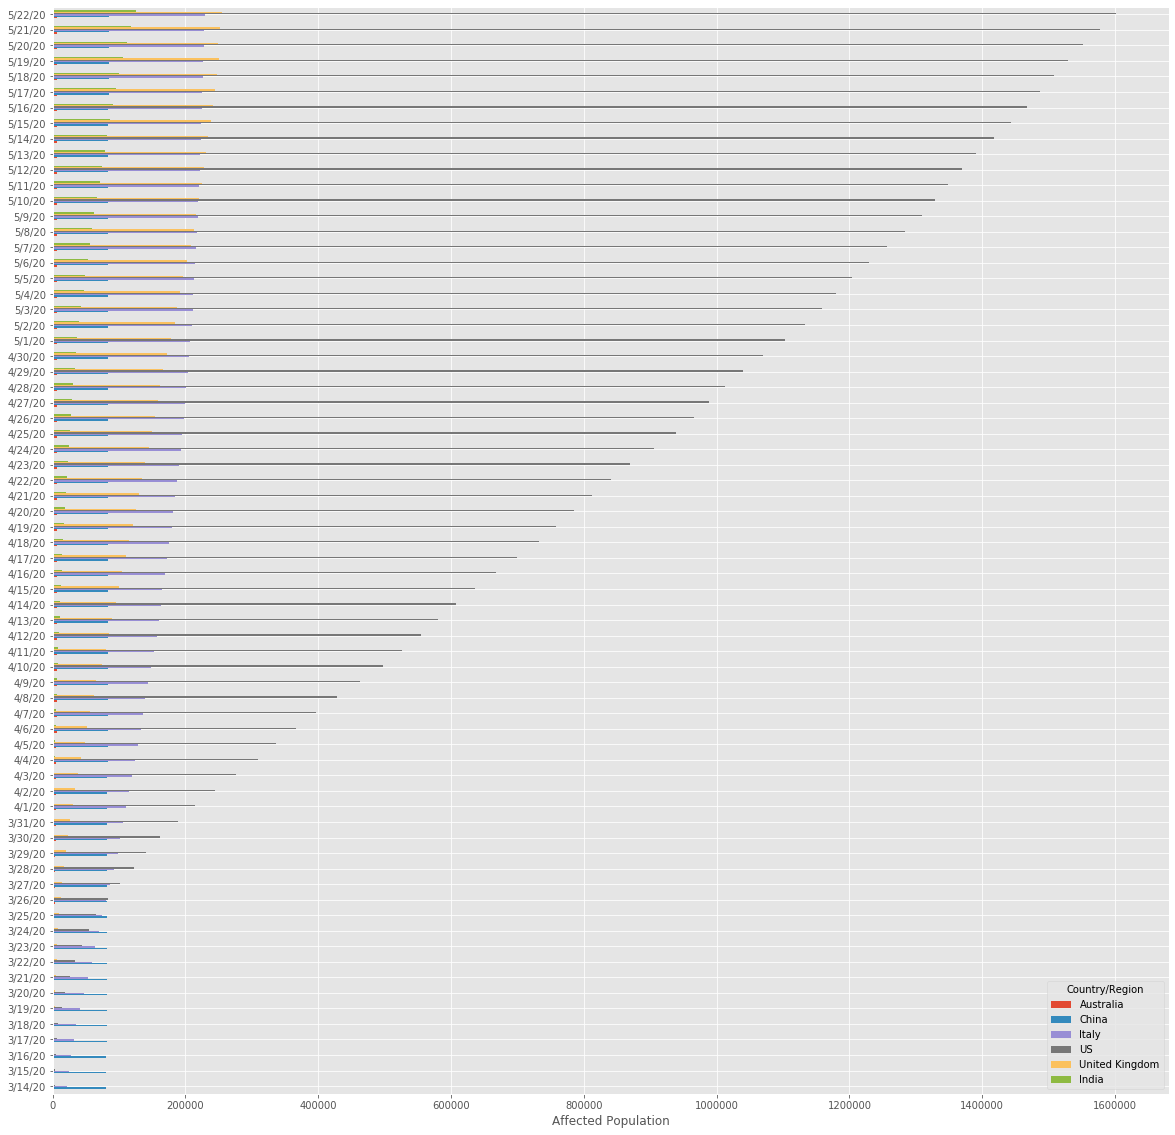

In [21]:
#Used Bar plot to plot the values 

rcParams['figure.figsize'] = 20, 20
plt.style.use('ggplot')

my_new_countries.plot(kind='barh')
plt.xlabel('Affected Population')

* Used above two plots to depict the trend of growth of the population affected on country level

## Normalisation by Population

Calculating the number of cases per million.

Downloaded the file from [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) and considered the data for year-2016

In [22]:
population = pd.read_csv('data/population-figures-by-country-csv_csv.csv')
population.sample()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
237,South Asia (IDA & IBRD),TSA,571857185.0,583950448.0,596504751.0,609376285.0,622875636.0,636754992.0,651094669.0,665871993.0,...,1.560689e+09,1.584247e+09,1.607562e+09,1.630730e+09,1.653756e+09,1.676614e+09,1.699306e+09,1.721841e+09,1.744191e+09,1.766383e+09


In [23]:
#Create a new dataframe which contains only the country name and the latest population recorded
country_population= population.copy()[['Country', 'Year_2016']]
country_population['Country']=country_population.loc[:,'Country']
# Extracted the data for countries in interest
co = ['Australia','China','Italy','United States','United Kingdom','Ireland','India']
country_population= country_population.loc[country_population['Country'].isin(co)]
country_population

,Country,Year_2016
11,Australia,2.412716e+07
38,China,1.378665e+09
79,United Kingdom,6.563724e+07
107,India,1.324171e+09
108,Ireland,4.773095e+06
113,Italy,6.060059e+07
248,United States,3.231275e+08


* As the country name for US didnt match with the population extracr. I have used reaplce method to change the column name.

In [24]:
# As US isn't matching with the grouped dataframe, replaced it using replace method
# Used copy method to overcome SettingWithCopyWarning warning
country_population["Country"].copy().replace({"United States": "US"}, inplace=True)
country_population

,Country,Year_2016
11,Australia,2.412716e+07
38,China,1.378665e+09
79,United Kingdom,6.563724e+07
107,India,1.324171e+09
108,Ireland,4.773095e+06
113,Italy,6.060059e+07
248,United States,3.231275e+08


In [25]:
mylist

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,84024,84029,84038,84044,84054,84063,84063,84063,84063,84081
Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658
US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1390406,1417774,1442824,1467820,1486757,1508308,1528568,1551853,1577147,1600937
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,230985,234440,238004,241461,244995,247709,250138,249619,252246,255544
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794


In [26]:
# Used iloc to get the last recorded data column and reset the index as column
latest = mylist.iloc[:,-1]
latest_df = latest.to_frame()
latest_df.reset_index(level=0, inplace=True)

latest_df['Country/Region']=latest_df['Country/Region']
# Saved the latest column name value in a variable abc
abc=latest_df.columns.values[len(latest_df.columns.values)-1]
# Renamed the latest column name of our covid-19 dataset to Cases
latest_df.rename(columns = {abc:'Cases'}, inplace = True) 
latest_df

,Country/Region,Cases
0,Australia,7099
1,China,84081
2,Italy,228658
3,US,1600937
4,United Kingdom,255544
5,India,124794


In [27]:
# Merge the two dataframes
dfinal = country_population.merge(latest_df, how='inner', left_on='Country', right_on='Country/Region')
dfinal.head()

,Country,Year_2016,Country/Region,Cases
0,Australia,2.412716e+07,Australia,7099
1,China,1.378665e+09,China,84081
2,United Kingdom,6.563724e+07,United Kingdom,255544
3,India,1.324171e+09,India,124794
4,Italy,6.060059e+07,Italy,228658


In [28]:
# Dropping the extra column for Country name
dfinal=dfinal.drop(['Country/Region'], axis=1)
# Modify the dataframe accoridng to our requirement
dfinal.rename(columns = {'Year_2016':'Total Population'}, inplace = True) 
dfinal

,Country,Total Population,Cases
0,Australia,2.412716e+07,7099
1,China,1.378665e+09,84081
2,United Kingdom,6.563724e+07,255544
3,India,1.324171e+09,124794
4,Italy,6.060059e+07,228658


In [29]:
# Calculate the number of cases per million of the population and add a column for it in dfinal dataframe
dfinal["per million cases"] = ((dfinal["Cases"]/dfinal["Total Population"])*100000)
dfinal

,Country,Total Population,Cases,per million cases
0,Australia,2.412716e+07,7099,29.4233
1,China,1.378665e+09,84081,6.09873
2,United Kingdom,6.563724e+07,255544,389.328
3,India,1.324171e+09,124794,9.42431
4,Italy,6.060059e+07,228658,377.32


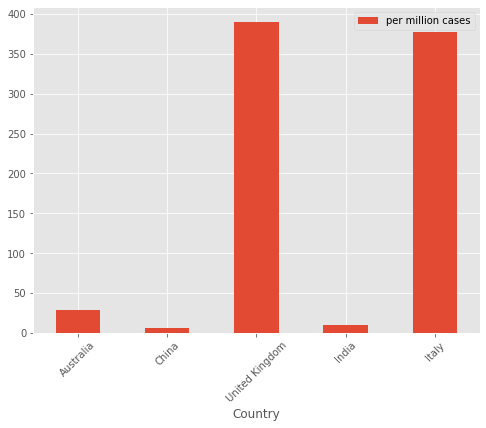

In [30]:
rcParams['figure.figsize'] = 8, 6
ax = dfinal.plot.bar(x='Country', y='per million cases', rot=45)

### Obseravtions
* Calculated the number of cases per million and plotted them.
* It is clear from the graph that US has highest number of cases per million followed by UK and Italy

### Building the Predictive Models

##### Considering US

In [31]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Get data for selected countries and take transpose of the result
model_countries = grouped.loc[['Australia','China','Italy','US','United Kingdom','India']].T

In [33]:
# Converting the datatype of our index values to timestamp
model_countries.index=pd.to_datetime(model_countries.index)

In [34]:
# Converting the date timestamp to logarithmic values for using in linear regression
y = np.reshape(np.log(model_countries["US"].values), (-1, 1))
X = np.reshape([np.log(i.timestamp()) for i in model_countries.index], (-1, 1))

* We divide the data into attributes and labels. Attributes are the independent variable and labels are dependent varibales/ variable to be predicted. Since we are predicting the data for US it is our label i.e. y and the entire dataset is attribute. Also as 2-D data is expected by sklearn we reshape the data.

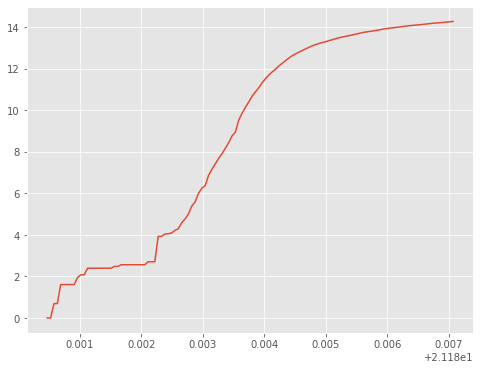

In [35]:
plt.figure(figsize=(8,6))
_ = plt.plot(X,y)

    - It is evident from the graph that there is some what linear relationship between X and y
    - Steps for building a linear regression model.
     1. Split the data into test and train by using the test_size as 25%
     2. Fit the model i.e. to train our model by passing fit() method to our traning dataset
     3. Predict the test data. This will show how accurately the model predicts

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

MSE: 1.8355795812888716
R^2: 0.9320592168912074


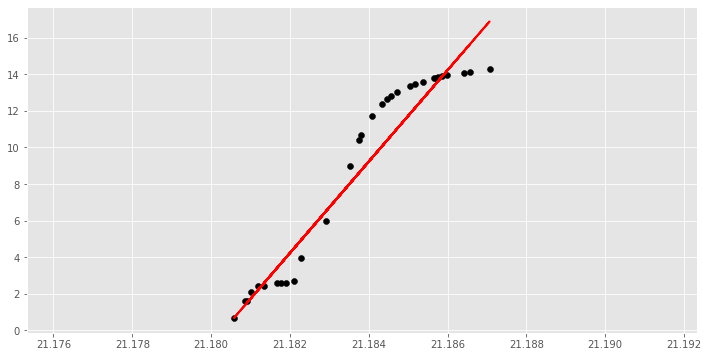

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))
print("R^2:", r2_score(y_test, pred))

plt.figure(figsize=(12,6))
_ = plt.scatter(X_test, y_test,  color='black')
_ = plt.plot(X_test, pred, color='red', linewidth=2)

There appears to be a clear linear relationship from the graph plot. The value for R^2 is very close to 1 i.e. 0.94, our model can predict 94% varition in the response variable which is a good indicator. Mean square error is the average of the square of the error and should be ideally low. A large value is not considered for the model. As we get a value of 1.5 for MSE and 0.94 for R^2 we can consider our model as a good fit.

##### Considering China

MSE: 23.620529529979642
R^2: 0.4317913947950134


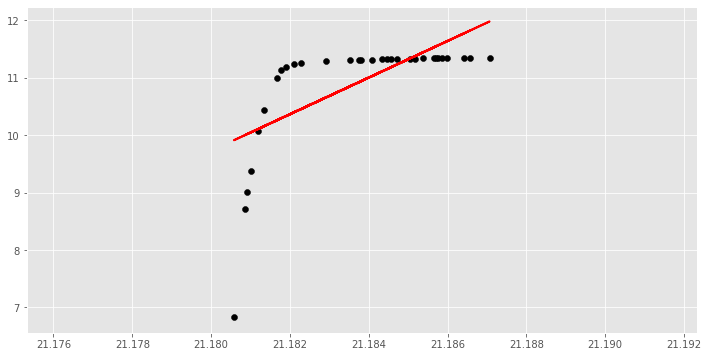

In [38]:
y1 = np.reshape(np.log(model_countries["China"].values), (-1, 1))
X1 = np.reshape([np.log(i.timestamp()) for i in model_countries.index], (-1, 1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)


lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

pred1 = lr1.predict(X1_test)

print("MSE:", mean_squared_error(y1_test, pred))
print("R^2:", r2_score(y1_test, pred1))

plt.figure(figsize=(12,6))
_ = plt.scatter(X1_test, y1_test,  color='black')
_ = plt.plot(X1_test, pred1, color='red', linewidth=2)

When we compare this model with the above model1(Considering US) the MSE and R^2 values are lower and thus the model is not as good as model1.

#### Variation in number of cases in China and US 

Text(0.5, 1, 'China')

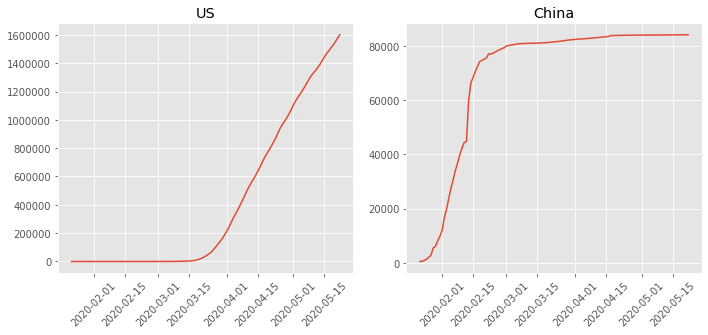

In [39]:
rcParams['figure.figsize'] = 10, 4
fig, ax = plt.subplots(1, 2)

_=ax[0].plot(model_countries.index, model_countries['US'])
_=ax[1].plot(model_countries.index, model_countries['China'])
fig.tight_layout()

ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)

ax[0].set_title('US')
ax[1].set_title('China')

#### Model for "number of days since the 100th case"  v/s "Commulative number of known cases since the 100th case"

In [40]:
model_countries1 = model_countries.copy()

In [41]:
model_countries1.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22'],
              dtype='datetime64[ns]', length=122, freq=None)

In [42]:
len(model_countries1.index)

122

In [43]:
i= []
for j in range(1,(len(model_countries1.index)+1)):
    i.append(j)

In [44]:
days = pd.Series(i) 

In [45]:
model_countries1

Country/Region,Australia,China,Italy,US,United Kingdom,India
2020-01-22,0,548,0,1,0,0
2020-01-23,0,643,0,1,0,0
2020-01-24,0,920,0,2,0,0
2020-01-25,0,1406,0,2,0,0
2020-01-26,4,2075,0,5,0,0
...,...,...,...,...,...,...
2020-05-18,7068,84063,225886,1508308,247709,100328
2020-05-19,7072,84063,226699,1528568,250138,106475
2020-05-20,7081,84063,227364,1551853,249619,112028
2020-05-21,7095,84063,228006,1577147,252246,118226


In [46]:
model_countries1=model_countries1.set_index(days)

In [47]:
model_countries1.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122],
           dtype='int64', length=122)

In [48]:
model_countries1.index.names=['Number of Days']

In [49]:
model_countries1.columns

Index(['Australia', 'China', 'Italy', 'US', 'United Kingdom', 'India'], dtype='object', name='Country/Region')

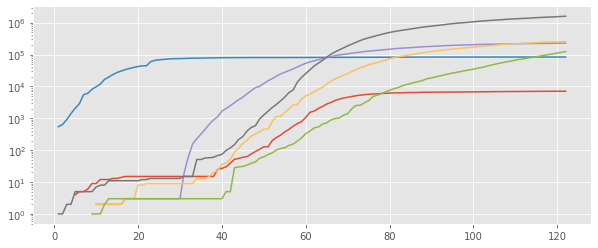

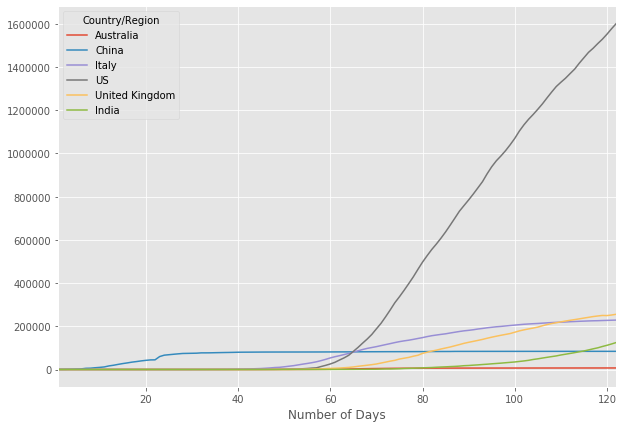

In [50]:
figure, ax = plt.subplots()

ax.plot(model_countries1)
plt.rcParams['figure.figsize'] = (10,7)
plt.yscale("log", nonposy='mask')
#ax.legends()
_ = model_countries1.plot()